In [1]:
import pandas as pd
import wandb
import numpy as np
import matplotlib.pyplot as plt
from wandb.apis.public import Runs
import sys
import os

In [2]:
plotting_dir = "Plots"

Index(['rollout/ep_rew_mean', 'rollout/num_crashes', 'rollout/ep_speed_mean',
       'rollout/num_crashes_mean', '_step', '_runtime', '_timestamp',
       'rollout/ep_len_mean'],
      dtype='object')


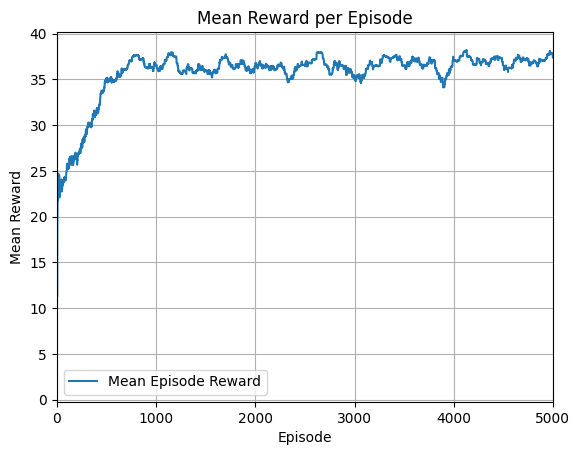

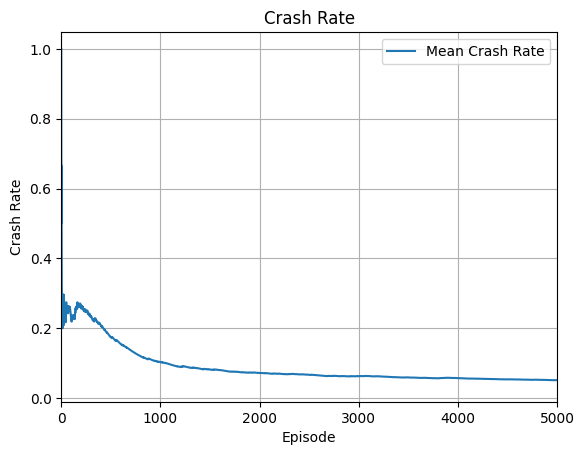

In [7]:
api = wandb.Api()
training_runs: Runs = api.runs(
    "amar-research/safetyh", filters={"tags": "dqn_ego_reward_curve"}
)

for run in training_runs:
    config = run.config
    history = run.scan_history()
    run_history = run.history(
        samples=history.max_step, x_axis="_step", pandas=(True), stream="default"
    )

run_history["Mean Episode Reward"] = run_history["rollout/ep_rew_mean"]
run_history["Mean Crash Rate"] = run_history["rollout/num_crashes_mean"]

fig, ax = plt.subplots()
run_history.plot(x="_step", y="Mean Episode Reward", ax=ax, kind="line")
ax.set_xlim(0, 5000)
ax.set_xlabel("Episode")
ax.set_ylabel("Mean Reward")
plt.title("Mean Reward per Episode")
plt.grid()

plt.savefig(os.path.join(plotting_dir, "dqn_ego_reward_curve.pdf"))

fig, ax = plt.subplots()
run_history.plot(x="_step", y="Mean Crash Rate", ax=ax, kind="line")
ax.set_xlim(0, 5000)
ax.set_xlabel("Episode")
ax.set_ylabel("Crash Rate")
plt.title("Crash Rate")
plt.grid()

plt.savefig(os.path.join(plotting_dir, "dqn_ego_crash_rate_curve.pdf"))